In [1]:
#import packages
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

#to plot within notebook
import matplotlib.pyplot as plt

#read the data file
df = pd.read_csv('data/upload_DJIA_table.csv')

#setting index as date
df['Date'] = pd.to_datetime(df.Date)
df.index = df['Date']

#converting dates into number of days as dates cannot be passed directly to any regression model
df.index = (df.index - pd.to_datetime(df['Date'].min())).days

In [5]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1989.000000,1989.000000,1989.000000,1989.000000,1.989000e+03,1989.000000
mean,13459.116048,13541.303173,13372.931728,13463.032255,1.628110e+08,13463.032255
std,3143.281634,3136.271725,3150.420934,3144.006996,9.392343e+07,3144.006996
min,6547.009766,6709.609863,6469.950195,6547.049805,8.410000e+06,6547.049805
25%,10907.339844,11000.980469,10824.759766,10913.379883,1.000000e+08,10913.379883
50%,13022.049805,13088.110352,12953.129883,13025.580078,1.351700e+08,13025.580078
75%,16477.699219,16550.070312,16392.769531,16478.410156,1.926000e+08,16478.410156
max,18315.060547,18351.359375,18272.560547,18312.390625,6.749200e+08,18312.390625


In [2]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
2884,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
2883,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2882,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
2881,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
2880,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [ ]:
import seaborn as sns

Closing price at 2029 would be around  [21482.57265882]


/var/folders/7y/57xm51hj4y11r4hg1s330bth0000gn/T/ipykernel_2979/1505307820.py:48: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use `.FigureManagerBase.set_window_title` or GUI-specific methods instead.
  fig.canvas.set_window_title('Stock Market Predictions')


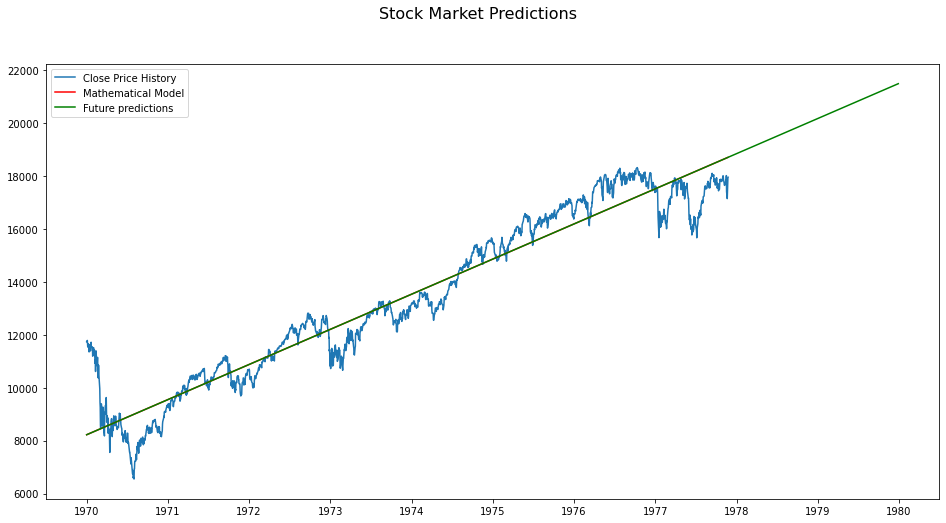

In [3]:
# Convert the pandas series into numpy array, we need to further massage it before sending it to regression model
y = np.asarray(df['Close'])
x = np.asarray(df.index.values)

# Model initialization
# by default the degree of the equation is 1.
# Hence the mathematical model equation is y = mx + c, which is an equation of a line.
regression_model = LinearRegression()

# Fit the data(train the model)
regression_model.fit(x.reshape(-1, 1), y.reshape(-1, 1))

# Prediction for historical dates. Let's call it learned values.
y_learned = regression_model.predict(x.reshape(-1, 1))


# Now, add future dates to the date index and pass that index to the regression model for future prediction.
# As we have converted date index into a range index, hence, here we just need to add 3650 days ( roughly 10 yrs)
# to the previous index. x[-1] gives the last value of the series.
newindex = np.asarray(pd.RangeIndex(start=x[-1], stop=x[-1] + 3650))

# Prediction for future dates. Let's call it predicted values.
y_predict = regression_model.predict(newindex.reshape(-1, 1))

#print the last predicted value
print ("Closing price at 2029 would be around ", y_predict[-1])

#convert the days index back to dates index for plotting the graph
x = pd.to_datetime(df.index, origin='1970-01-01', unit='D')
future_x = pd.to_datetime(newindex, origin='1970-01-01', unit='D')

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

#plot the actual data
plt.figure(figsize=(16,8))
plt.plot(x,df['Close'], label='Close Price History')

#plot the regression model
plt.plot(x,y_learned, color='r', label='Mathematical Model')

#plot the future predictions
plt.plot(future_x,y_predict, color='g', label='Future predictions')

plt.suptitle('Stock Market Predictions', fontsize=16)

fig = plt.gcf()
fig.canvas.set_window_title('Stock Market Predictions')

plt.legend()
plt.show()